# 1. Define genetic algorithm suite

In [1]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

from src.prediction.gpr_model_trainer import GPRModelTrainer
from src.prediction.etr_model_trainer import EtrModelTrainer

from src.ga.chromosome.vent_hole import VentHole

from src.ga.gene.shape.shape_variations import (
    double_parabolic_params,
    ray_params,
    circle_params,
    donut_params,
    hole_params,
    trapezoid_params,
    triangle_params,
    wing_params,
)
from src.ga.gene.pattern.pattern_variations import (
    circular_params,

)

from src.ga.ga_pipeline import GAPipeline

from src.ga.p1_initialize.init_vent import VentInitializer
from src.ga.p2_fitness.vent_fitness import Criterion, VentFitnessCalculator
from src.ga.p3_select.behaviors import (
    TournamentSelectionFilter,
    ElitismSelectionFilter,
    RouletteWheelSelectionFilter,
)
from src.ga.p4_crossover.behaviors import (
    OnePointCrossover,
    TwoPointCrossover,
    UniformCrossover,
)

# ----------------- Define the GA CONSTANTS -----------------
# 1. Define the criteria weights, w1, w2, w3
CRITERIA_WEIGHT = (1, 1.4, 0.4)

# 2. Define the criteria with direction, min, and max values
DRAG_CRITERION: Criterion = ("lower", 0.2, 0.3)  # Lower is better, range 0.2 to 0.3
DRAG_STD_CRITERION: Criterion = ("lower", 0, 0.05)  # Lower is better, range 0 to 0.05

AVG_TEMP_CRITERION: Criterion = (
    "lower",
    250,
    450,
)  # Lower is better, range 250K to 400K
AVG_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

MAX_TEMP_CRITERION: Criterion = (
    "lower",
    300,
    500,
)  # Lower is better, range 300K to 500K
MAX_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

# 3. Define the grid parameters
GRID_SCALE = 1
# Scaling factor

GRID_RESOLUTION = 2
# Grid resolution

GRID_WIDTH = 100
# Grid width, ~= canvas size

GRID_BOUND = (
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
)
# ----------------- Define the GA MODELS -----------------

gpr_kernel = ConstantKernel(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gpr_model_trainer = GPRModelTrainer(
    gpr_kernel=gpr_kernel,
    gpr_drag_config=(10, 1e-5),
    gpr_max_temp_config=(10, 1e-3),
    gpr_avg_temp_config=(10, 1e-3),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

etr_model_trainer = EtrModelTrainer(
    etr_drag_config=(100, 42),
    etr_max_temp_config=(100, 42),
    etr_avg_temp_config=(100, 42),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

# ----------------- Define the GA PIPELINES -----------------
suite = GAPipeline[VentHole](
    suite_name="exp/Roullete/config",
    suite_max_count=50,
    suite_min_population=20,
    suite_min_chromosome=40,
    crossover_behavior=UniformCrossover(),
    selector_behavior=RouletteWheelSelectionFilter(roulette_pointer_count=4),
    fitness_calculator=VentFitnessCalculator(
        model_trainer_tuple=(
            gpr_model_trainer,
            etr_model_trainer,
            etr_model_trainer,
        ),
        criteria_weight_list=CRITERIA_WEIGHT,
        drag_criterion=DRAG_CRITERION,
        drag_std_criterion=DRAG_STD_CRITERION,
        avg_temp_criterion=AVG_TEMP_CRITERION,
        avg_temp_std_criterion=AVG_TEMP_STD_CRITERION,
        max_temp_criterion=MAX_TEMP_CRITERION,
        max_temp_std_criterion=MAX_TEMP_STD_CRITERION,
    ),
    immediate_exit_condition=lambda x: x[0] >= 0.725 and x[1] >= 0.725,
    mutation_probability=0.01,
    population_initializer=VentInitializer(
        population_size=500,
        grid_scale=GRID_SCALE,
        grid_resolution=GRID_RESOLUTION,
        pattern_bound=GRID_BOUND,
        pattern_gene_pool=[circular_params],
        shape_gene_pool=[
            double_parabolic_params,
            ray_params,
            circle_params,
            donut_params,
            hole_params,
            trapezoid_params,
            triangle_params,
            wing_params

        ],
    ),
)

[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.j

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: C

-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
--------------------------------------------------------------------------------
| [ModelTrainer]: Optimal feature count founded: 151 for desired variance: 0.9 |
--------------------------------------------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
-------

# 2. Run genetic algorithm

매번 run을 실행할 때마다, 개체 수, 격자 해상도 등에 따라 다르지만, **수행 시간이 길 수 있습니다.**

In [2]:
suite.run()

----------------------------------------------------------------------------------------------------
>> GA started
----------------------------------------------------------------------------------------------------
Suite_name: exp/Roullete/config
Suite_max_count: 50
Suite_min_population: 20
Suite_min_chromosome: 40
Immediate_exit: False
Generation: 0
Initial_population: 500
Population_count: 0
Unique_population_count: 0
Mutation_count: 0
Mutation_probability: 0.01
Fitness_calculator: GPR
Selector_behavior: RouletteWheelSelection
Crossover_behavior: Uniform Crossover
Population_initializer: VentInitializer
----------------------------------------------------------------------------------------------------
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/Roullete/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/Roullete/config/biased_fitness

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Error at mutation chromosome is skipped: float division by zero
[Storage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/Roullete/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/Roullete/config/biased_fitness_evolution.json
[PopulationStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/Roullete/config/population.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/Roullete/config/fitness.json
----------------------------------------------------------------------------------------------------
>> Generation: 28, Population: 412, Unique population: 151, Should Stop: False
---------------------------------------------------------------

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Error at mutation chromosome is skipped: float division by zero
Error at mutation chromosome is skipped: cannot convert float NaN to integer
[Storage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/Roullete/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/Roullete/config/biased_fitness_evolution.json
[PopulationStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/Roullete/config/population.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/Roullete/config/fitness.json
----------------------------------------------------------------------------------------------------
>> Generation: 32, Population: 388, Unique population: 143, Shoul

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[Storage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/Roullete/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/Roullete/config/biased_fitness_evolution.json
[PopulationStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/Roullete/config/population.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/Roullete/config/fitness.json
----------------------------------------------------------------------------------------------------
>> Generation: 39, Population: 292, Unique population: 66, Should Stop: False
----------------------------------------------------------------------------------------------------
[PopulationStorage]: JSON d

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Error at mutation chromosome is skipped: float division by zero
Error at mutation chromosome is skipped: float division by zero
[Storage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/Roullete/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/Roullete/config/biased_fitness_evolution.json
[PopulationStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/Roullete/config/population.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/Roullete/config/fitness.json
[PopulationStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/Roullete/config/population.json
[StochasticStorage]: JSON data saved to

# 3. Plot fitness result

- `biased_fitness`: 가중치가 적용된 fitness, $w1 * p1 + w2 * p2+ ...$
- `fitness`: 가중치 없이 계산된 fitness, $p1 + p2 + ...$

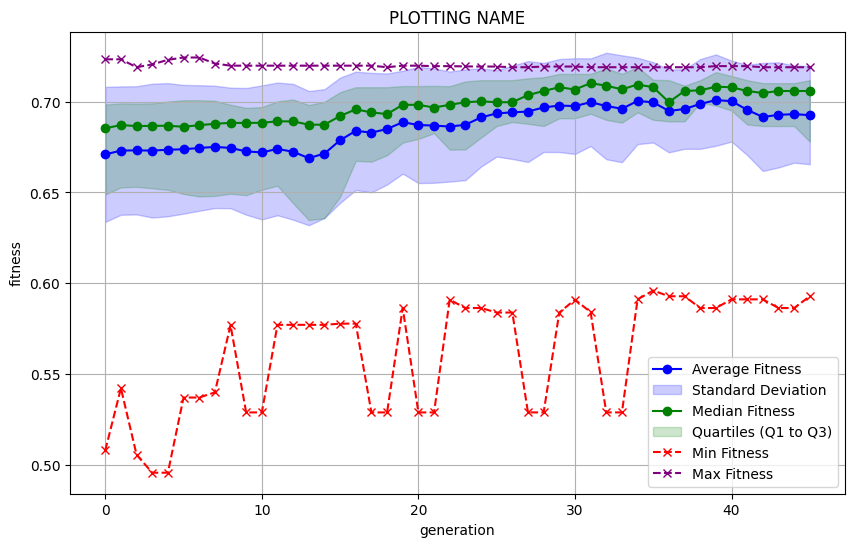

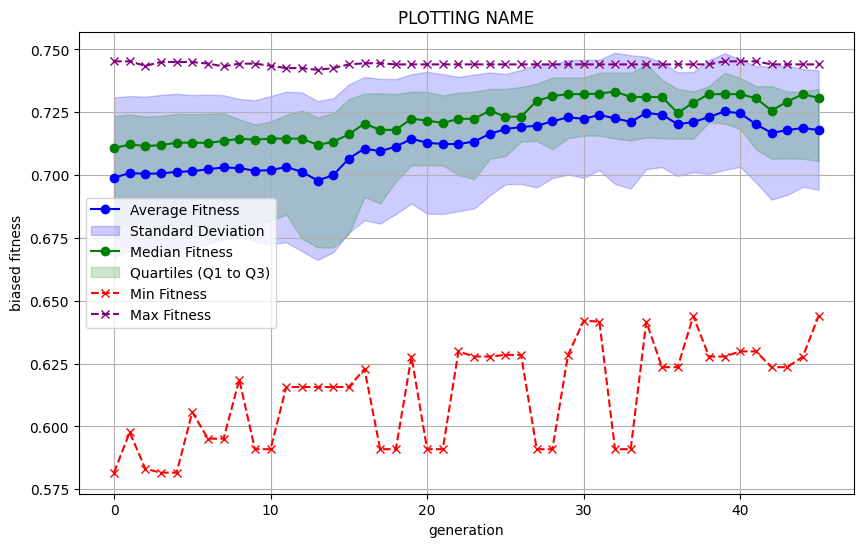

In [3]:
suite.evolution_storage.plot_fitness(
    storage="fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="fitness",
)
suite.evolution_storage.plot_fitness(
    storage="biased_fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="biased fitness",
)

# 4. Analyze final population(unique)

1. population은 최종 선택된 개체만 남게 됩니다.
2. `population[i]`는 각 VentHole 유전자(Chromosome)이 도출됩니다.
3. `population[i].pattern_matrix` 에는 pattern에 격자화된 point vector가 존재합니다.
3. `population[i].gene_tuple` 을 통해 최종적인 유전자에 접근할 수 있습니다.


--------------------------------------------------
label: VentHole Chromosome_36: ['WingShape_398', 'CircularStrictTransformation_16']
predict: (0.2893405391962154, 372.8701239000001, 456.0954220999996)
biased_fitness: 0.734312896537846, fitness: 0.7117668780378474
shape parameter:
parameter_list: [ c: 3.7718298283040923, ]
pattern parameter:
parameter_list: [ di: 0.0, dx: 7.441087862192063, phi: 0.5711986642890533, ]


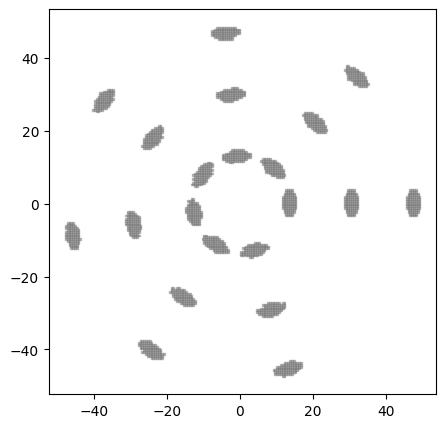

--------------------------------------------------
label: VentHole Chromosome_16: ['TrapezoidShape_405', 'CircularStrictTransformation_36']
predict: (0.29351708347304717, 374.07052480000004, 456.78311779999996)
biased_fitness: 0.6827692560695279, fitness: 0.6605609522695282
shape parameter:
parameter_list: [ k1: 3.795727049551927, k2: 2.2662331195073704, ]
pattern parameter:
parameter_list: [ di: 0.0, dx: 7.441087862192063, phi: 0.5711986642890533, ]


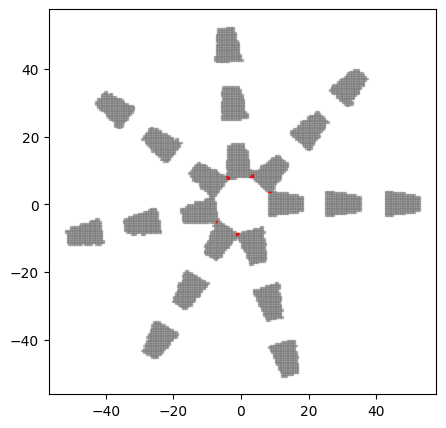

--------------------------------------------------
label: VentHole Chromosome_16: ['TrapezoidShape_16', 'CircularStrictTransformation_16']
predict: (0.29350557301913893, 373.91577070000017, 456.5388557999998)
biased_fitness: 0.6844561633086097, fitness: 0.6626711373086107
shape parameter:
parameter_list: [ k1: 3.795727049551927, k2: 2.2662331195073704, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


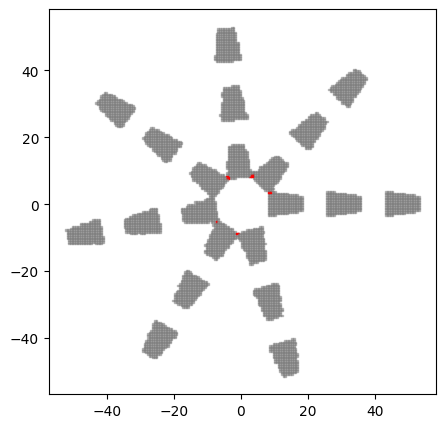

--------------------------------------------------
label: VentHole Chromosome_16: ['WingShape_16', 'CircularStrictTransformation_441']
predict: (0.2893405391962154, 372.8701239000001, 456.0954220999996)
biased_fitness: 0.734312896537846, fitness: 0.7117668780378474
shape parameter:
parameter_list: [ c: 2.903383026615229, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


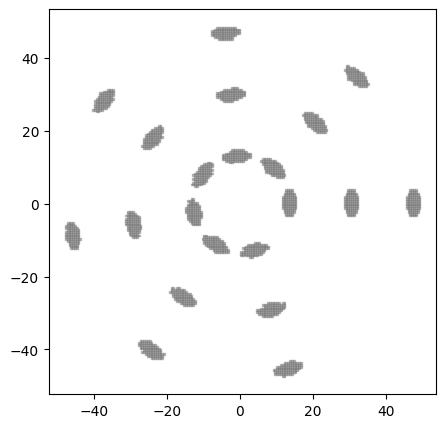

--------------------------------------------------
label: VentHole Chromosome_138: ['WingShape_372', 'CircularStrictTransformation_16']
predict: (0.28944642492736117, 372.9136076, 458.2546325999998)
biased_fitness: 0.7286312323263886, fitness: 0.6996945497263892
shape parameter:
parameter_list: [ c: 2.903383026615229, ]
pattern parameter:
parameter_list: [ di: 0.0, dx: 7.441087862192063, phi: 0.5711986642890533, ]


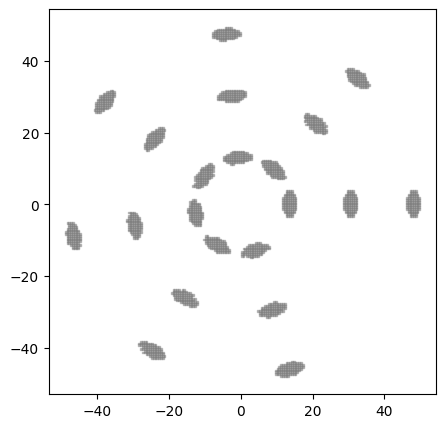

--------------------------------------------------
label: VentHole Chromosome_16: ['WingShape_138', 'CircularStrictTransformation_28']
predict: (0.28865141129273986, 372.9316864, 456.0956898999996)
biased_fitness: 0.7407727024726022, fitness: 0.7183490055726033
shape parameter:
parameter_list: [ c: 2.903383026615229, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


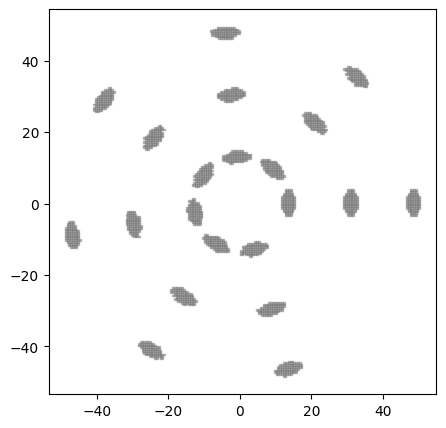

--------------------------------------------------
label: VentHole Chromosome_28: ['WingShape_138', 'CircularStrictTransformation_16']
predict: (0.2893405391962154, 372.8701239000001, 456.0954220999996)
biased_fitness: 0.734312896537846, fitness: 0.7117668780378474
shape parameter:
parameter_list: [ c: 2.903383026615229, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


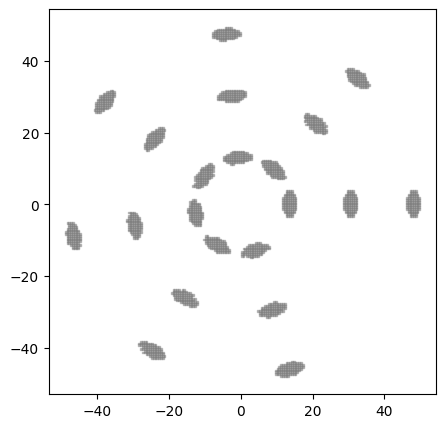

--------------------------------------------------
label: VentHole Chromosome_16: ['WingShape_441', 'CircularStrictTransformation_138']
predict: (0.28898048561706924, 373.7413030999999, 456.7220041)
biased_fitness: 0.730562013929308, fitness: 0.7078786078293079
shape parameter:
parameter_list: [ c: 2.903383026615229, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


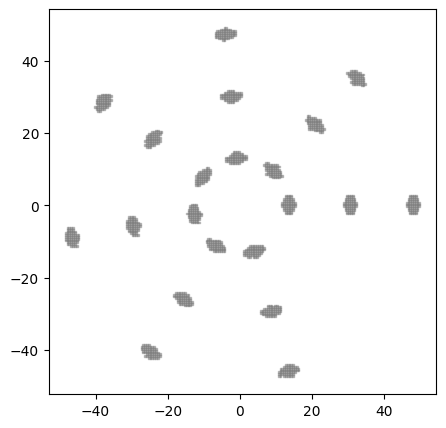

--------------------------------------------------
label: VentHole Chromosome_441: ['TrapezoidShape_16', 'CircularStrictTransformation_16']
predict: (0.2912940803240349, 373.2061531000001, 455.39252339999985)
biased_fitness: 0.7138310782596501, fitness: 0.6940658142596509
shape parameter:
parameter_list: [ k1: 3.795727049551927, k2: 2.2662331195073704, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


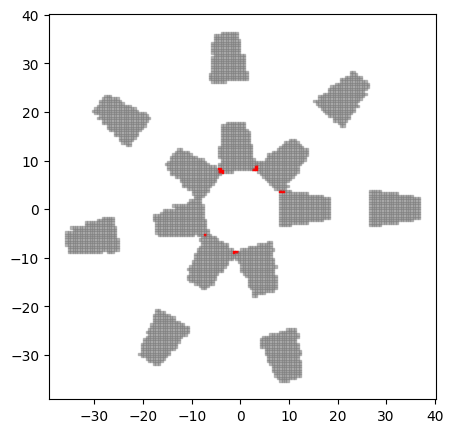

--------------------------------------------------
label: VentHole Chromosome_398: ['WingShape_372', 'CircularStrictTransformation_398']
predict: (0.28958564900132355, 372.8049434000001, 456.8326229999999)
biased_fitness: 0.7308436601867637, fitness: 0.7059556779867643
shape parameter:
parameter_list: [ c: 2.903383026615229, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


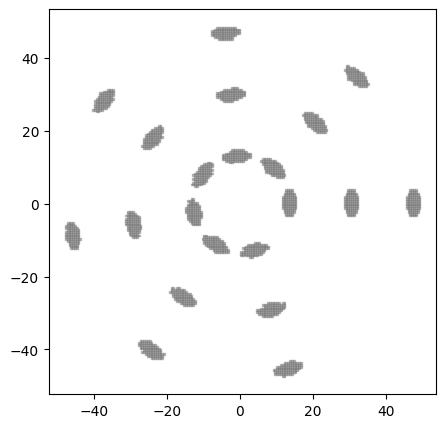

--------------------------------------------------
label: VentHole Chromosome_28: ['WingShape_16', 'CircularStrictTransformation_16']
predict: (0.29091195606037323, 373.1316913000001, 457.22402639999984)
biased_fitness: 0.714510547496267, fitness: 0.6891018508962677
shape parameter:
parameter_list: [ c: 2.903383026615229, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


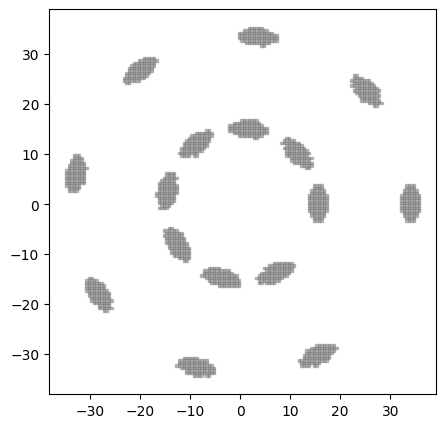

--------------------------------------------------
label: VentHole Chromosome_138: ['CircleShape_405', 'CircularStrictTransformation_28']
predict: (0.28940518947354965, 372.59979320000014, 457.00352019999985)
biased_fitness: 0.7337425124645026, fitness: 0.7079315382645034
shape parameter:
parameter_list: [ r: 2.387223002152097, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


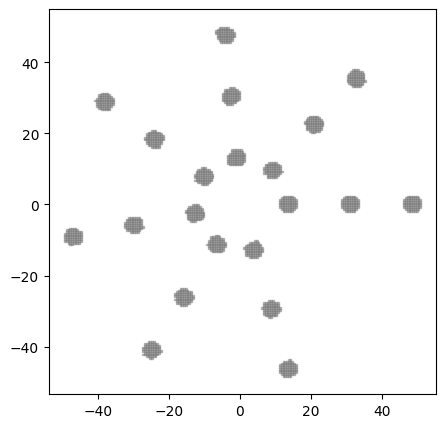

--------------------------------------------------
label: VentHole Chromosome_36: ['CircleShape_138', 'CircularStrictTransformation_441']
predict: (0.28999961327873525, 373.4911977, 456.58184979999976)
biased_fitness: 0.722401783712648, fitness: 0.6996386297126487
shape parameter:
parameter_list: [ r: 2.387223002152097, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


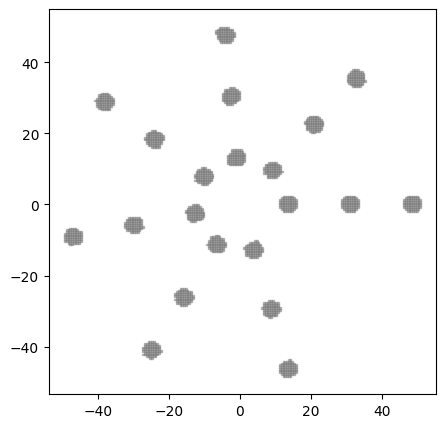

--------------------------------------------------
label: VentHole Chromosome_36: ['WingShape_16', 'CircularStrictTransformation_138']
predict: (0.29231160826759695, 373.5784553, 459.63273059999995)
biased_fitness: 0.6925692690240307, fitness: 0.6608279878240308
shape parameter:
parameter_list: [ c: 2.903383026615229, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


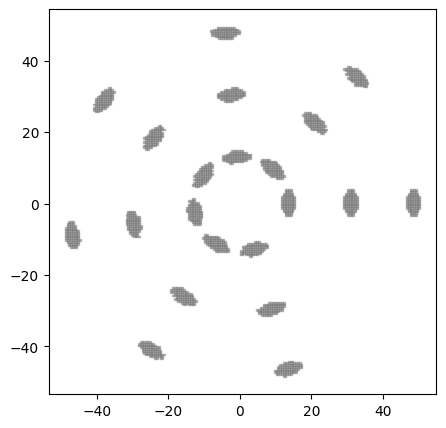

--------------------------------------------------
label: VentHole Chromosome_16: ['CircleShape_36', 'CircularStrictTransformation_398']
predict: (0.28837673441652, 372.9151617, 457.0995349999996)
biased_fitness: 0.7416274539348005, fitness: 0.7161591723348018
shape parameter:
parameter_list: [ r: 2.387223002152097, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


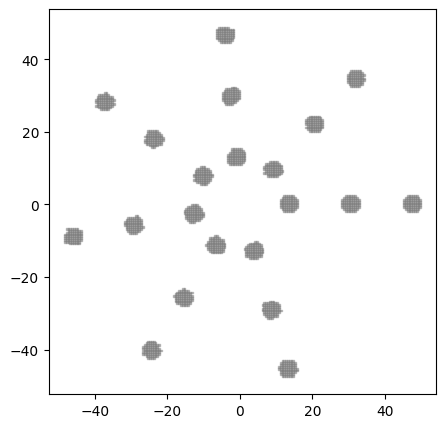

--------------------------------------------------
label: VentHole Chromosome_398: ['CircleShape_16', 'CircularStrictTransformation_138']
predict: (0.2898123550017586, 372.79987680000005, 456.90166509999983)
biased_fitness: 0.7284739821824138, fitness: 0.7033687404824144
shape parameter:
parameter_list: [ r: 2.387223002152097, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 6.934959049688275, phi: 0.5711986642890533, ]


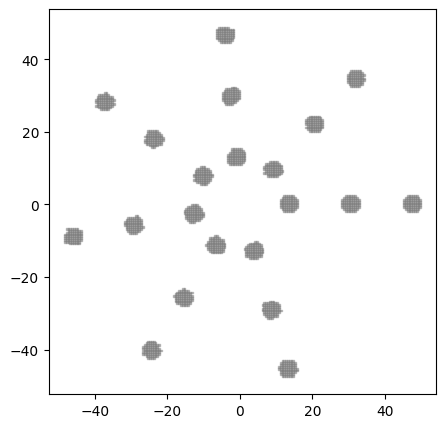

--------------------------------------------------
label: VentHole Chromosome_405: ['CircleShape_398', 'CircularStrictTransformation_16']
predict: (0.28931043231980347, 373.13247950000004, 455.8933552999996)
biased_fitness: 0.7331816097019658, fitness: 0.7117665028019671
shape parameter:
parameter_list: [ r: 2.387223002152097, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


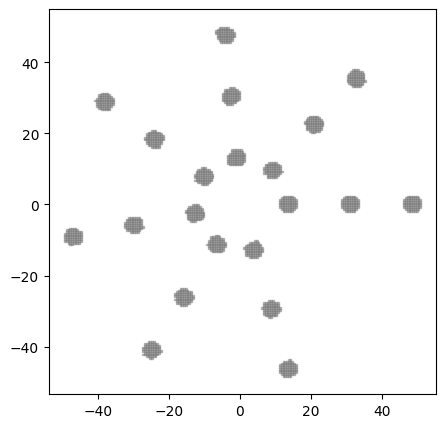

--------------------------------------------------
label: VentHole Chromosome_16: ['WingShape_36', 'CircularStrictTransformation_405']
predict: (0.29215500744691525, 372.70879970000004, 455.9241863999999)
biased_fitness: 0.7076399548308473, fitness: 0.6852849950308478
shape parameter:
parameter_list: [ c: 2.903383026615229, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


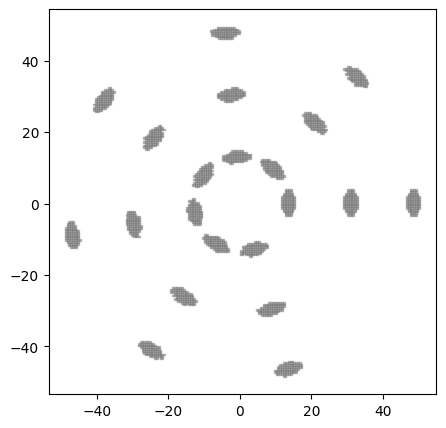

--------------------------------------------------
label: VentHole Chromosome_411: ['DonutShape_16', 'CircularStrictTransformation_12']
predict: (0.28836915619503056, 372.88826299999994, 457.69947649999995)
biased_fitness: 0.7406916440496949, fitness: 0.7133697405496949
shape parameter:
parameter_list: [ r_inner: 4.076592072424323, r_outer: 7.81633083833584, ]
pattern parameter:
parameter_list: [ di: 0.0, dx: 7.441087862192063, phi: 0.5711986642890533, ]


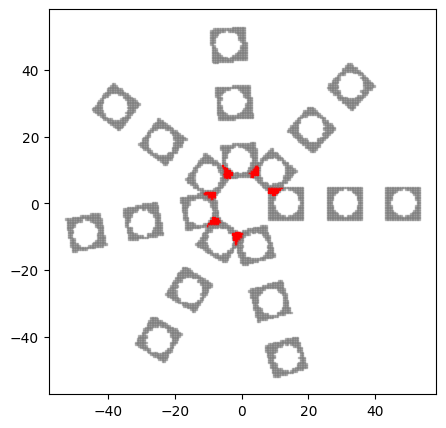

--------------------------------------------------
label: VentHole Chromosome_138: ['DonutShape_411', 'CircularStrictTransformation_372']
predict: (0.29119381633716124, 373.69824409999995, 458.3218754999998)
biased_fitness: 0.7055303769283883, fitness: 0.6779612386283888
shape parameter:
parameter_list: [ r_inner: 4.076592072424323, r_outer: 7.81633083833584, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.900046819363524, phi: 0.5711986642890533, ]


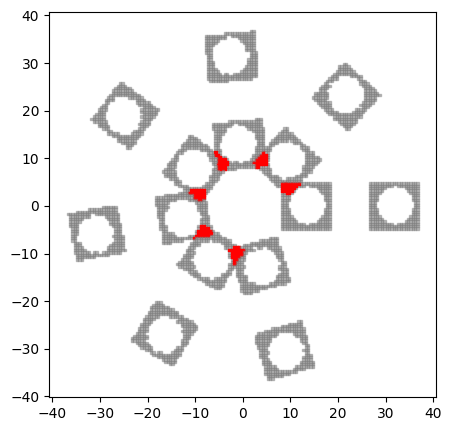

--------------------------------------------------
label: VentHole Chromosome_138: ['WingShape_36', 'CircularStrictTransformation_405']
predict: (0.2889220546783644, 373.11960840000006, 457.1192713999998)
biased_fitness: 0.7347036516163559, fitness: 0.7095850542163566
shape parameter:
parameter_list: [ c: 3.7718298283040923, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


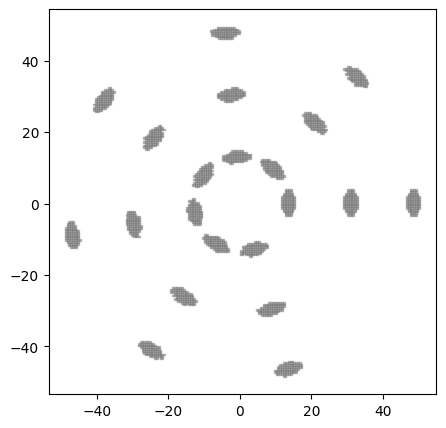

--------------------------------------------------
label: VentHole Chromosome_405: ['TrapezoidShape_36', 'CircularStrictTransformation_138']
predict: (0.29350557301913893, 373.91577070000017, 456.5388557999998)
biased_fitness: 0.6844561633086097, fitness: 0.6626711373086107
shape parameter:
parameter_list: [ k1: 3.795727049551927, k2: 2.2662331195073704, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


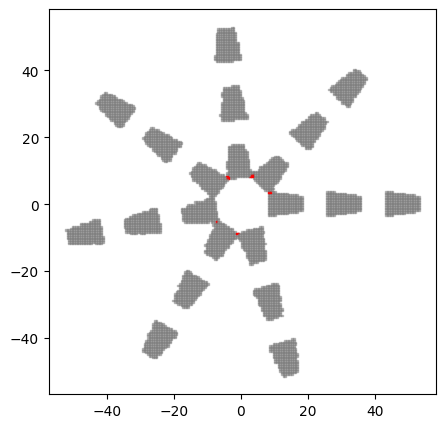

--------------------------------------------------
label: VentHole Chromosome_405: ['DoubleParabolicShape_138', 'CircularStrictTransformation_405']
predict: (0.2917786409133196, 373.50136549999996, 459.06045059999974)
biased_fitness: 0.6995831311668044, fitness: 0.6694045103668051
shape parameter:
parameter_list: [ lower_coefficient: 1.6017309685148302, upper_coefficient: 1.0354054124515442, lower_y-intercept: 2.1171088702583725, upper_y-intercept_from_lower_y: 1.8017573697566296, lower_x_trans: -4.4816396195688295, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


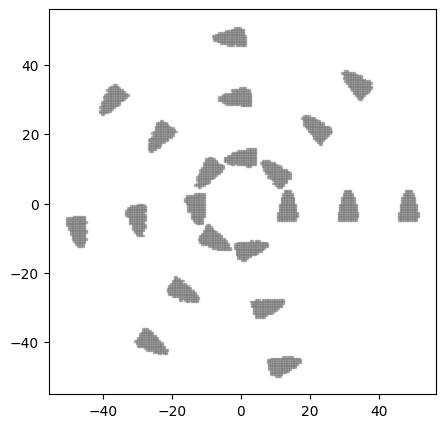

--------------------------------------------------
label: VentHole Chromosome_138: ['WingShape_28', 'CircularStrictTransformation_138']
predict: (0.28898048561706924, 373.7413030999999, 456.7220041)
biased_fitness: 0.730562013929308, fitness: 0.7078786078293079
shape parameter:
parameter_list: [ c: 2.903383026615229, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.900046819363524, phi: 0.5711986642890533, ]


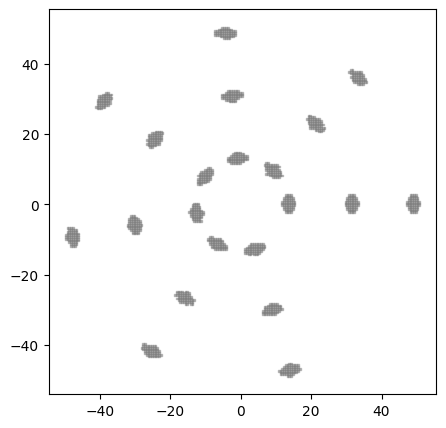

--------------------------------------------------
label: VentHole Chromosome_28: ['WingShape_138', 'CircularStrictTransformation_411']
predict: (0.2902277970572993, 373.49060209999993, 456.17133979999977)
biased_fitness: 0.720945135127008, fitness: 0.6994123199270085
shape parameter:
parameter_list: [ c: 2.903383026615229, ]
pattern parameter:
parameter_list: [ di: 0.0, dx: 7.441087862192063, phi: 0.5711986642890533, ]


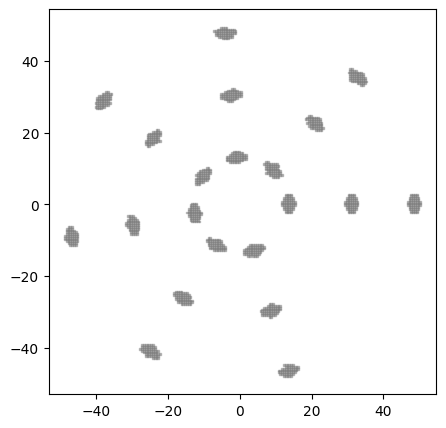

--------------------------------------------------
label: VentHole Chromosome_405: ['WingShape_12', 'CircularStrictTransformation_405']
predict: (0.2893405391962154, 372.8701239000001, 456.0954220999996)
biased_fitness: 0.734312896537846, fitness: 0.7117668780378474
shape parameter:
parameter_list: [ c: 2.903383026615229, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


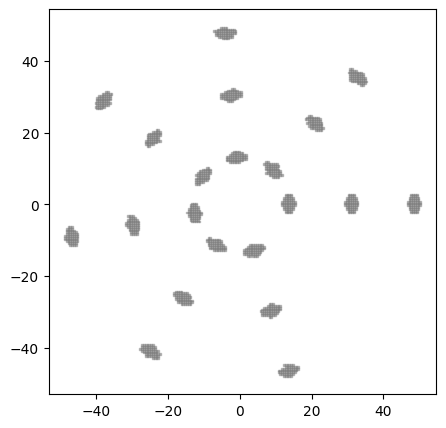

--------------------------------------------------
label: VentHole Chromosome_441: ['HoleShape_138', 'CircularStrictTransformation_405']
predict: (0.29642332925742076, 373.63863850000007, 458.21338569999995)
biased_fitness: 0.6538694665257918, fitness: 0.6265065864257922
shape parameter:
parameter_list: [ hole_r: 3.586225408617089, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


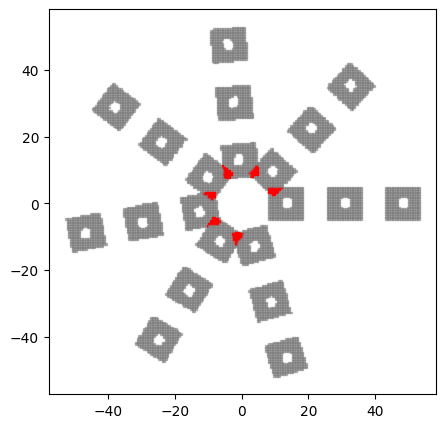

--------------------------------------------------
label: VentHole Chromosome_16: ['HoleShape_441', 'CircularStrictTransformation_36']
predict: (0.2960071895131313, 373.70899399999996, 459.5642092000003)
biased_fitness: 0.6548367284686862, fitness: 0.6235620888686855
shape parameter:
parameter_list: [ hole_r: 3.586225408617089, ]
pattern parameter:
parameter_list: [ di: 0.0, dx: 7.441087862192063, phi: 0.5711986642890533, ]


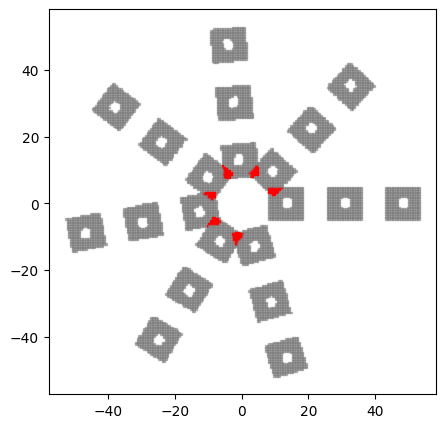

--------------------------------------------------
label: VentHole Chromosome_398: ['HoleShape_16', 'CircularStrictTransformation_405']
predict: (0.29462580978439057, 374.2636175, 461.2924739999998)
biased_fitness: 0.6613116316560945, fitness: 0.6259614446560952
shape parameter:
parameter_list: [ hole_r: 3.586225408617089, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


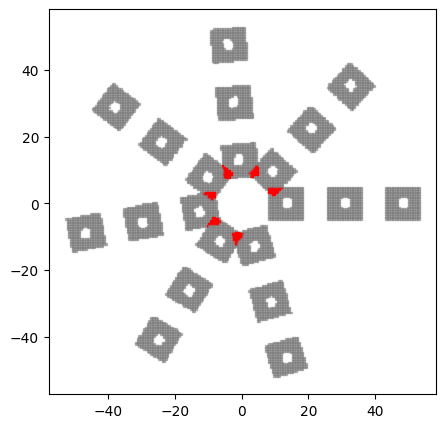

--------------------------------------------------
label: VentHole Chromosome_441: ['HoleShape_398', 'CircularStrictTransformation_405']
predict: (0.2954815428210029, 374.0694572000001, 466.3885745000001)
biased_fitness: 0.6439212223899697, fitness: 0.5928944132899696
shape parameter:
parameter_list: [ hole_r: 3.586225408617089, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


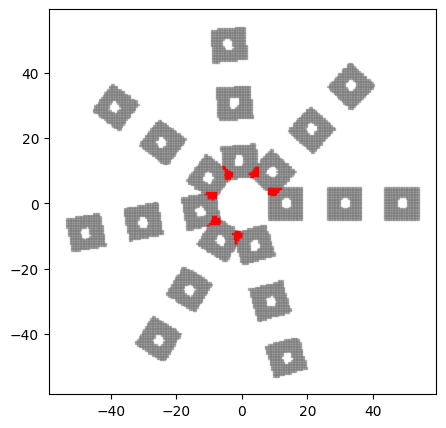

--------------------------------------------------
label: VentHole Chromosome_486: ['TrapezoidShape_138', 'CircularStrictTransformation_16']
predict: (0.2912940803240349, 373.2061531000001, 455.39252339999985)
biased_fitness: 0.7138310782596501, fitness: 0.6940658142596509
shape parameter:
parameter_list: [ k1: 3.795727049551927, k2: 2.2662331195073704, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


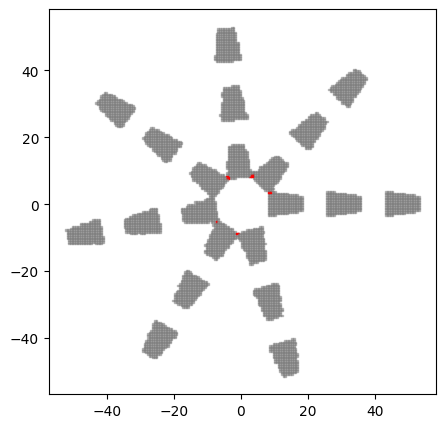

--------------------------------------------------
label: VentHole Chromosome_398: ['DoubleParabolicShape_411', 'CircularStrictTransformation_16']
predict: (0.29099009783825824, 372.87451509999994, 457.9812049)
biased_fitness: 0.7140150061174177, fitness: 0.6858204216174176
shape parameter:
parameter_list: [ lower_coefficient: 1.6017309685148302, upper_coefficient: 1.0354054124515442, lower_y-intercept: 2.1171088702583725, upper_y-intercept_from_lower_y: 1.8017573697566296, lower_x_trans: -4.4816396195688295, ]
pattern parameter:
parameter_list: [ di: 0.0, dx: 7.441087862192063, phi: 0.5711986642890533, ]


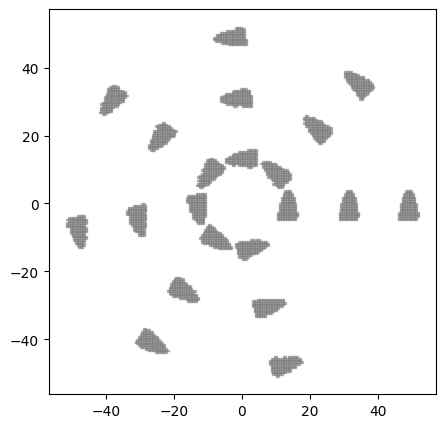

--------------------------------------------------
label: VentHole Chromosome_405: ['WingShape_16', 'CircularStrictTransformation_36']
predict: (0.2893642943008219, 372.6282197000002, 457.35090490000005)
biased_fitness: 0.7332577092917794, fitness: 0.7064614339917796
shape parameter:
parameter_list: [ c: 2.903383026615229, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


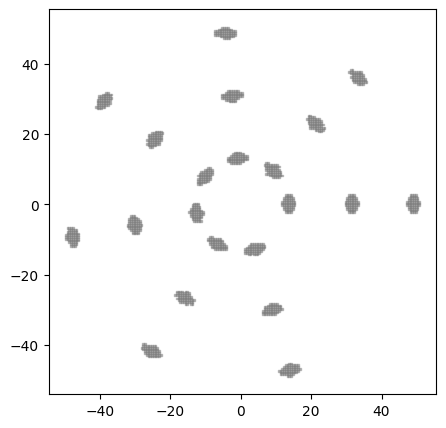

--------------------------------------------------
label: VentHole Chromosome_398: ['TrapezoidShape_28', 'CircularStrictTransformation_36']
predict: (0.29350557301913893, 373.91577070000017, 456.5388557999998)
biased_fitness: 0.6844561633086097, fitness: 0.6626711373086107
shape parameter:
parameter_list: [ k1: 3.795727049551927, k2: 2.2662331195073704, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


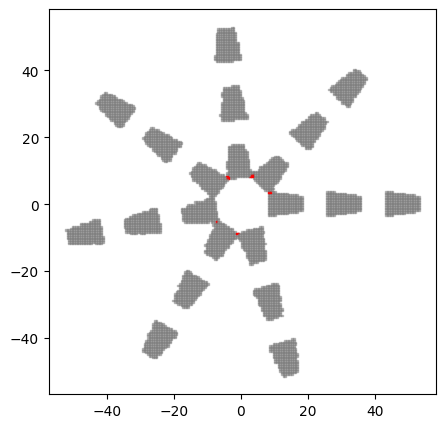

--------------------------------------------------
label: VentHole Chromosome_138: ['DoubleParabolicShape_398', 'CircularStrictTransformation_36']
predict: (0.2922159318269675, 373.55886479999987, 457.96450189999996)
biased_fitness: 0.6969996243303261, fitness: 0.670223848230326
shape parameter:
parameter_list: [ lower_coefficient: 1.6017309685148302, upper_coefficient: 1.0354054124515442, lower_y-intercept: 2.1171088702583725, upper_y-intercept_from_lower_y: 1.8017573697566296, lower_x_trans: -4.4816396195688295, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


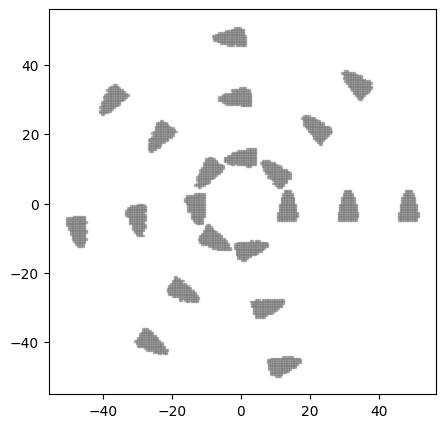

--------------------------------------------------
label: VentHole Chromosome_16: ['WingShape_486', 'CircularStrictTransformation_398']
predict: (0.2900978687348341, 372.6962233000002, 457.5312681999999)
biased_fitness: 0.7250852131516574, fitness: 0.6978838551516582
shape parameter:
parameter_list: [ c: 2.903383026615229, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


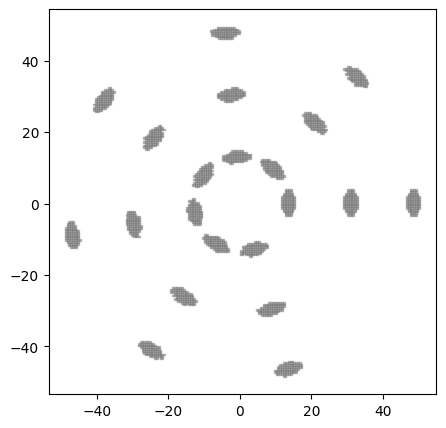

--------------------------------------------------
label: VentHole Chromosome_28: ['WingShape_28', 'CircularStrictTransformation_441']
predict: (0.2900978687348341, 372.6962233000002, 457.5312681999999)
biased_fitness: 0.7250852131516574, fitness: 0.6978838551516582
shape parameter:
parameter_list: [ c: 3.7718298283040923, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


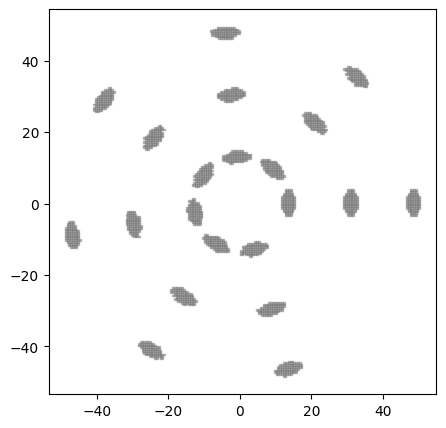

--------------------------------------------------
label: VentHole Chromosome_16: ['DonutShape_398', 'CircularStrictTransformation_398']
predict: (0.29364690857418596, 373.5698996999998, 457.9377292)
biased_fitness: 0.6826661579581418, fitness: 0.6559927697581415
shape parameter:
parameter_list: [ r_inner: 4.076592072424323, r_outer: 7.81633083833584, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


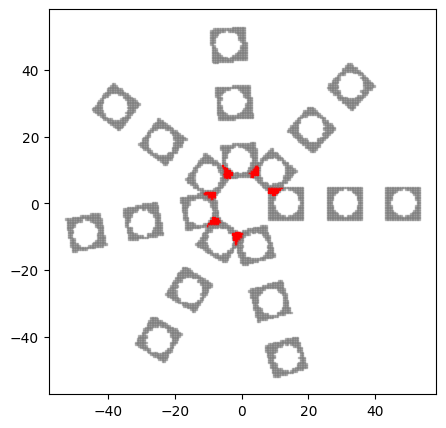

--------------------------------------------------
label: VentHole Chromosome_138: ['WingShape_16', 'CircularStrictTransformation_138']
predict: (0.2893642943008219, 372.6282197000002, 457.35090490000005)
biased_fitness: 0.7332577092917794, fitness: 0.7064614339917796
shape parameter:
parameter_list: [ c: 2.903383026615229, ]
pattern parameter:
parameter_list: [ di: 0.0, dx: 7.441087862192063, phi: 0.5711986642890533, ]


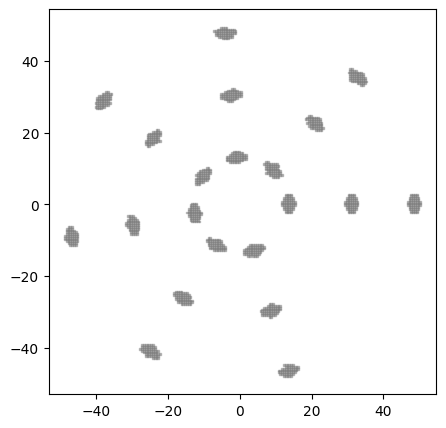

--------------------------------------------------
label: VentHole Chromosome_36: ['WingShape_405', 'CircularStrictTransformation_441']
predict: (0.29007133273835484, 372.8547186999999, 455.2555660999997)
biased_fitness: 0.7287925095164525, fitness: 0.7087352486164532
shape parameter:
parameter_list: [ c: 2.903383026615229, ]
pattern parameter:
parameter_list: [ di: 8.174904350689445, dx: 7.441087862192063, phi: 0.5711986642890533, ]


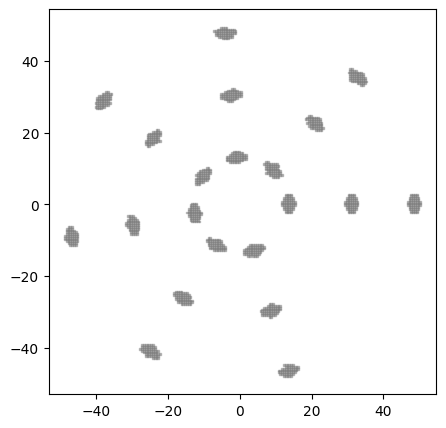

In [4]:
from src.grid.visualize_points import visualize_points


for pop in suite.unique_population:
    print("-" * 50)
    print(f"label: {pop.label}")
    print(f"predict: {pop.fitness_pure_result}")
    print(f"biased_fitness: {pop.biased_fitness}, fitness: {pop.fitness}")

    shape, pattern = pop.gene_tuple
    print("shape parameter:")
    shape.print_parameter_info()
    print("pattern parameter:")
    pattern.print_parameter_info()

    visualize_points(
        pop.pattern.pattern_matrix,
        pop.pattern.pattern_unit.grid.k,
        fig_size=(5, 5),
    )